<a href="https://colab.research.google.com/github/9berny9/cookie_cats_analysis/blob/main/cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAČTENÍ KNIHOVEN

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# READING DATA

In [2]:
url = 'https://raw.githubusercontent.com/9berny9/cookie_cats_analysis/main/cookie_cats.csv?token=GHSAT0AAAAAABTXMXCXNO4434XQSJR7QTR2YWG4M2Q'
df = pd.read_csv(url, encoding='unicode_escape')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


Data neobsahují nulové hodnoty.

In [4]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
df.tail()

,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


# Základní popisné statistiky

In [6]:
df.sum_gamerounds.describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

- data neobsahují nulové hodnoty (počet záznamů je shodný s počtem uživatelů)
- 25% uživatelů z našeho datasetu odehrálo 5 her během 14 dnů.
- 50% medián uživatelů z našeho datasetu odehrálo 16 her během 14 dnů.
- 75% uživatelů z našeho datasetu odehrálo 51 her během 14 dnů.
- minimální počet odehraných her je 0, takže uživatel pouze nainstaloval hru
- maximální počet odehraných her je 49854 a tento počet her se výrazně vychyluje od ostatních odehraných her
- směrodatná odchylka se výrazně liší od průměru, takže se v měření nachází odlehlá měření

# Kontrola dat

In [7]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

V datech se nenachází Null hodnoty

In [8]:
# check unique user id
df.userid.nunique()

90189

User ID je vždy unikátní.

In [9]:
df.version.nunique()

2

In [10]:
df.version.value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

V datasetu se nachází pouze dvě verze módů, což odpovídá A/B testování a Gate 40 má více záznamů než Gate 30.


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


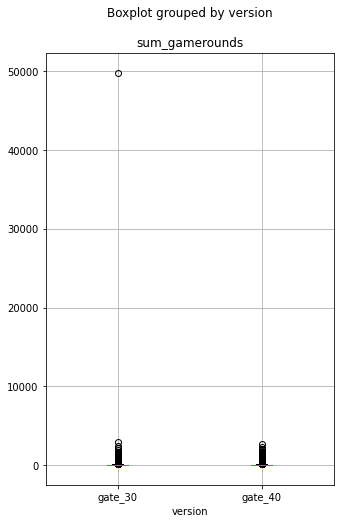

In [84]:
df.boxplot(column="sum_gamerounds", by="version", figsize=(5, 8));

Z krabicového grafu jsme nalezli výskyt odlehlých měření, které je potřeba vyfiltrovat.

In [57]:
# rozdělení dat podle A/B testu
data_gate30 = df[df.version == "gate_30"].sum_gamerounds
data_gate40 = df[df.version == "gate_40"].sum_gamerounds

In [85]:
# Metoda IQR - interquartal range 
# Gate 30
Q1_a = data_gate30.quantile(0.25)
Q3_a = data_gate30.quantile(0.75)
IQR_a = Q3_a - Q1_a
dolni_hranice_a = Q1_a - 1.5 * IQR_a
horni_hranice_a = Q3_a + 1.5 * IQR_a

# Gate 40
Q1_b = data_gate40.quantile(0.25)
Q3_b = data_gate40.quantile(0.75)
IQR_b = Q3_b - Q1_b
dolni_hranice_b = Q1_b - 1.5 * IQR_b
horni_hranice_b = Q3_b + 1.5 * IQR_b

# Zobrazení
print("Dolní hranice pro Gate 30: ", dolni_hranice_a)
print("Horní hranice pro Gate 30: ", horni_hranice_a)
print('')
print("Dolní hranice pro Gate 40: ", dolni_hranice_b)
print("Horní hranice pro Gate 40: ", horni_hranice_b)

Dolní hranice pro Gate 30:  -62.5
Horní hranice pro Gate 30:  117.5

Dolní hranice pro Gate 40:  -65.5
Horní hranice pro Gate 40:  122.5


Zamyslet se jaké odlehlé hodnoty chci řešit. Řešil bych hodnoty pouze s více hry jak 2 a potom po horní hranici

In [92]:
df[df.sum_gamerounds < 130]

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
3,483,gate_40,1,False,False
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
